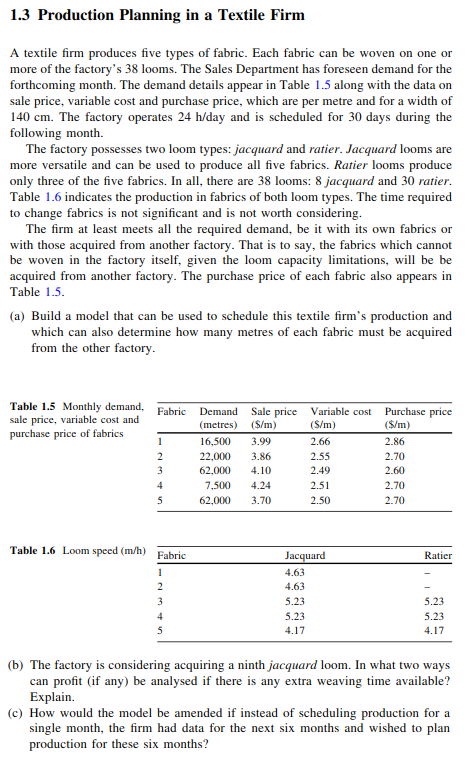

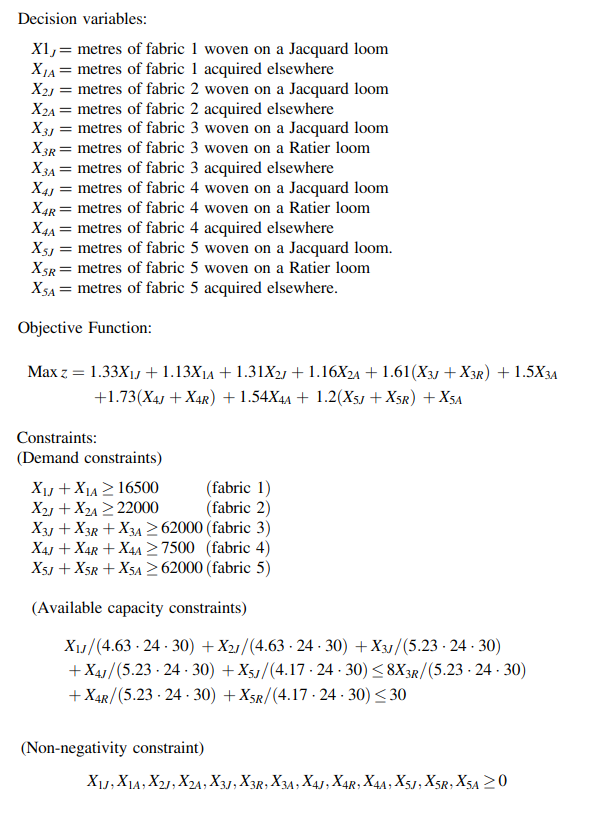

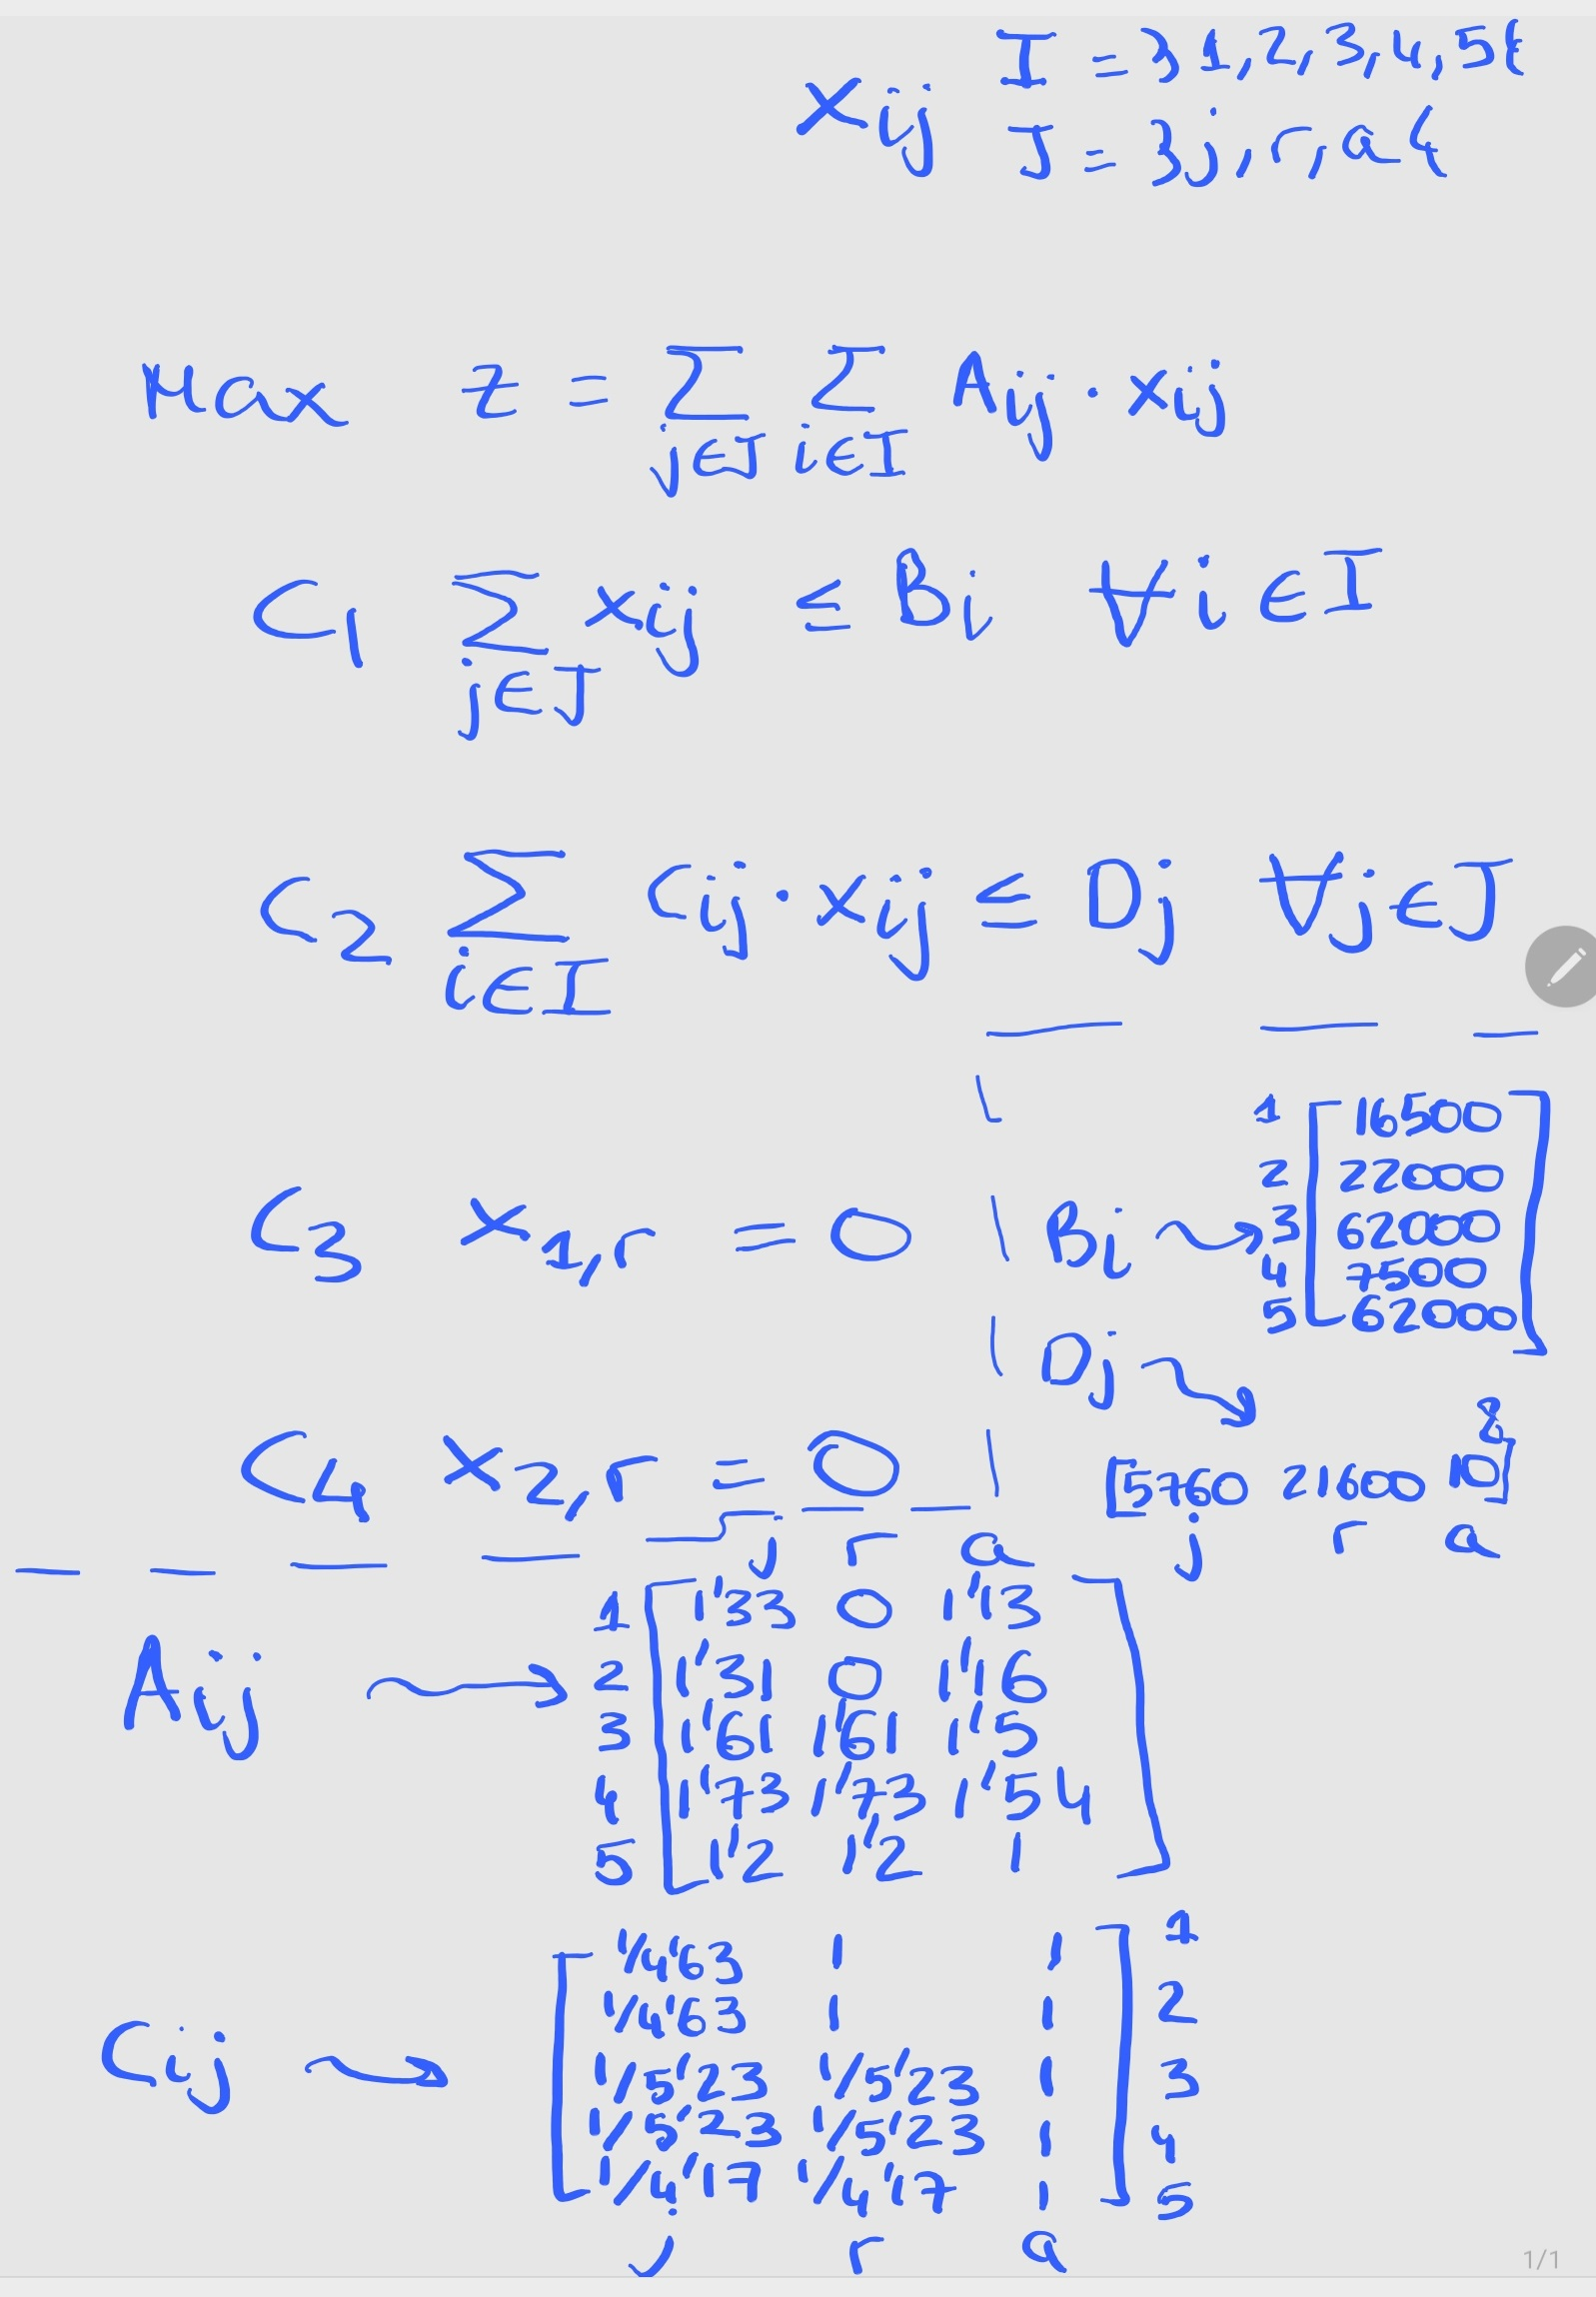

To make it more coherent with the other Colab and solvable, we will:
- Include the variables x1r and x2r, even though they are 0.
- Change the >= in the demand constraints for <=; if not, there won't be a feasible solution but manufacturing the amount of fabric we can and buy the rest (until infinity), as there is a small profit even if we sell the fabric we just buy to another factory.
- To do the sets, we invent an additional constraint that will not take action in practice: it is the one "limiting" the production of outside purchased fabric ("a"), which is set to a high value so that it is not limited in practice.

In [1]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

In [2]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [3]:
#Defining the model

model = pyo.ConcreteModel()

In [4]:
#Defining the sets

model.i=pyo.Set(initialize = ["x1","x2","x3","x4","x5"])
model.j=pyo.Set(initialize = ["j","r","a"])

In [5]:
#Defining the parameters

model.A = pyo.Param(model.i,model.j, initialize={("x1","j"):1.33,("x1","r"):0,("x1","a"):1.13,
                                                         ("x2","j"):1.31,("x2","r"):0,("x2","a"):1.16,
                                                         ("x3","j"):1.61,("x3","r"):1.61,("x3","a"):1.5,
                                                         ("x4","j"):1.73,("x4","r"):1.73,("x4","a"):1.54,
                                                         ("x5","j"):1.2,("x5","r"):1.2,("x5","a"):1})
A = model.A

model.B = pyo.Param(model.i,initialize={("x1"):16500,("x2"):22000,("x3"):62000,("x4"):7500,("x5"):62000})
B = model.B

model.C = pyo.Param(model.i,model.j,initialize={("x1","j"):1/4.63,("x1","r"):1,("x1","a"):1,
                                                         ("x2","j"):1/4.63,("x2","r"):1,("x2","a"):1,
                                                         ("x3","j"):1/5.23,("x3","r"):1/5.23,("x3","a"):1,
                                                         ("x4","j"):1/5.23,("x4","r"):1/5.23,("x4","a"):1,
                                                         ("x5","j"):1/4.17,("x5","r"):1/4.17,("x5","a"):1})
C = model.C

model.D = pyo.Param(model.j,initialize={("j"):8*24*30,("r"):30*24*30,("a"):1000000000})
D = model.D

In [6]:
#Decision variables

model.x=pyo.Var(model.i, model.j, within=pyo.NonNegativeReals)
x=model.x

In [7]:
#Objective rule and constraints
def Objective_rule(model):
  return sum(sum(A[i,j]*x[i,j] for i in model.i) for j in model.j)
model.Obj = pyo.Objective(rule=Objective_rule, sense = pyo.maximize)

def Constraint1(model,i):
  return (sum(x[i,j] for j in model.j)  <= B[i])
model.Const1 = pyo.Constraint(model.i,rule=Constraint1)

def Constraint2(model,j):
  return (sum(C[i,j]*x[i,j] for i in model.i) <= D[j])
model.Const2 = pyo.Constraint(model.j,rule=Constraint2)

def Constraint3(model):
  return x["x1","r"]==0
model.Const3 = pyo.Constraint(rule=Constraint3)

def Constraint4(model):
  return x["x2","r"]==0
model.Const4 = pyo.Constraint(rule=Constraint4)

In [8]:
optm = SolverFactory('glpk')
results=optm.solve(model)

In [9]:
print(results)


Problem: 
- Name: unknown
  Lower bound: 232413.178896882
  Upper bound: 232413.178896882
  Number of objectives: 1
  Number of constraints: 10
  Number of variables: 15
  Number of nonzeros: 32
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.0040743350982666016
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



In [10]:
print("objective function: ", model.Obj())
for i,j in x:
    print('Fabric ',i,' in ',j,': ', x[i,j](), ' m')

objective function:  232413.1788968825
Fabric  x1  in  j :  16500.0  m
Fabric  x1  in  r :  0.0  m
Fabric  x1  in  a :  0.0  m
Fabric  x2  in  j :  10168.8  m
Fabric  x2  in  r :  0.0  m
Fabric  x2  in  a :  11831.2  m
Fabric  x3  in  j :  0.0  m
Fabric  x3  in  r :  27707.8081534772  m
Fabric  x3  in  a :  34292.1918465228  m
Fabric  x4  in  j :  0.0  m
Fabric  x4  in  r :  7500.0  m
Fabric  x4  in  a :  0.0  m
Fabric  x5  in  j :  0.0  m
Fabric  x5  in  r :  62000.0  m
Fabric  x5  in  a :  0.0  m
